In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

microsoft_data=pd.read_csv('train.csv')


In [2]:
microsoft_data.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [3]:
microsoft_data['HasDetections']

0         0.0
1         0.0
2         0.0
3         1.0
4         1.0
         ... 
183100    1.0
183101    0.0
183102    1.0
183103    0.0
183104    NaN
Name: HasDetections, Length: 183105, dtype: float64

In [4]:
#chisquare test between OsBuild and HasDetections
import scipy

from scipy.stats import chi2_contingency

contingency_table=pd.crosstab(microsoft_data['OsBuild'],microsoft_data['HasDetections'])

results=chi2_contingency(contingency_table)

print('p-value',results[1])

#there is some correlation


p-value 2.3608142877761282e-60


In [5]:
y=microsoft_data['HasDetections']
#microsoft_data.drop(columns='HasDetections',inplace=True)

missing_value_percentage_df=pd.DataFrame({'Column_Name':microsoft_data.columns,
                                         'Missing_vale_count':microsoft_data.isnull().sum(),
                                         'Missing_value_percentage':microsoft_data.isnull().sum()/microsoft_data.shape[0]*100})

missing_value_percentage_df=missing_value_percentage_df.sort_values(by='Missing_value_percentage',ascending=False)

len(microsoft_data['OsBuild'].value_counts())


47

In [6]:
microsoft_data['HasDetections'].value_counts()

0.0    91568
1.0    91536
Name: HasDetections, dtype: int64

In [7]:
import numpy as np #logistic regression sigmoid function

def sigmoid(x):
    return 1/(1+np.exp(-x))

sigmoid(0)

sigmoid(100)

1.0

In [8]:
input_range=range(-100,100)

sigmoid_values=[]

for num in input_range:
    sigmoid_values.append(sigmoid(num))
    
#sigmoid_values
    

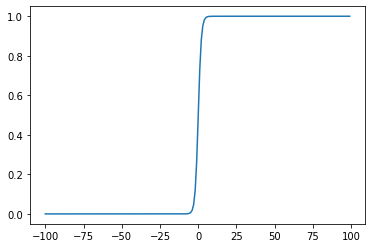

In [13]:
import matplotlib.pyplot as plt

plt.plot(input_range,sigmoid_values)